# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inlines
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [2]:
data=pd.read_csv("house.csv")
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


# Checking For Null

In [3]:

features_with_na=[features for features in data.columns if data[features].isnull().sum()]

for feature in features_with_na:
    
    print(feature,(data[feature].isnull().sum()))
    
    #print(feature,np.round(data[feature].isnull().mean(),4),"% missing values")

# Exploratory Data Analysis

Text(0.5, 1.0, 'Year Sold Vs Sale Price')

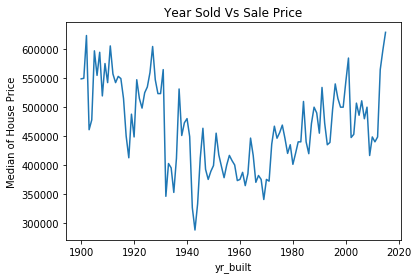

In [4]:
#we groupby data w.r.t yrbyuilt and then plot it to check whether it has any effect on price

data.groupby("yr_built")['price'].median().plot()
plt.xlabel("yr_built")
plt.ylabel("Median of House Price")
plt.title("Year Sold Vs Sale Price")

# Extracting Numerical Features

In [5]:
#All those columns whose dtype is not object will be consider as Numerical columns

numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']
print("Number of Numeric Variables ",len(numerical_features))
data[numerical_features].head(5)

Number of Numeric Variables  19


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [6]:
# All those numerical columns who contans unique data less then 25 is considered as discrete features

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 ]
print("Total Discrete Variables {}".format(len(discrete_feature)))

Total Discrete Variables 6


# Impact of Independent Features on Sale Price

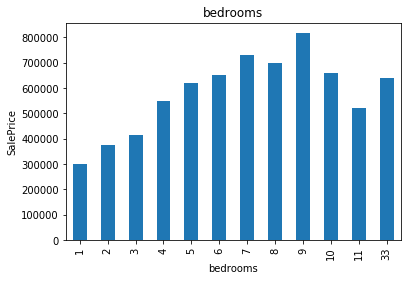

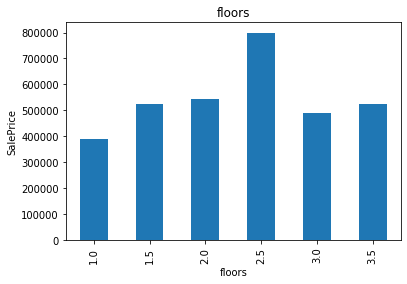

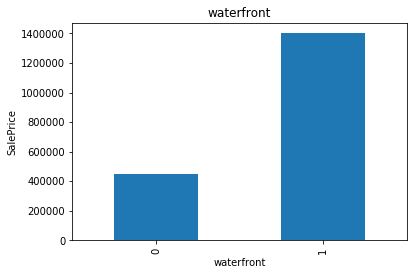

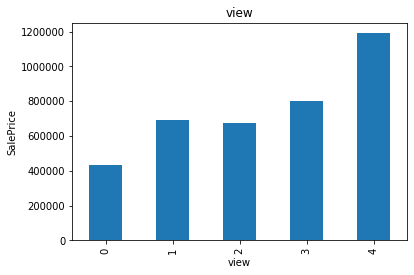

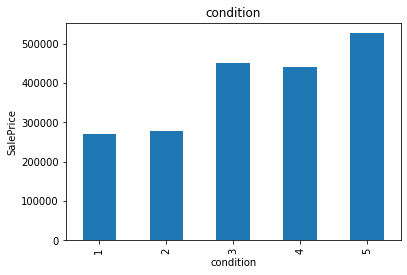

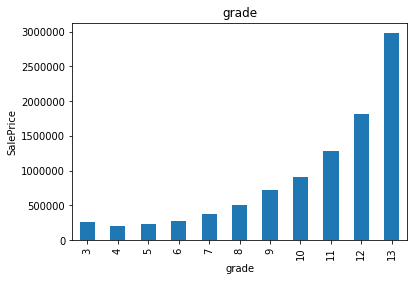

In [7]:
# we will iterate loop over all the discrete columns to check its dependency on Sales Price of House 
for feature in discrete_feature:
    dataset=data.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

# Distribution of Continuous Features

In [8]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Total Continuous Variables {}".format(len(continuous_feature)))

Total Continuous Variables 13


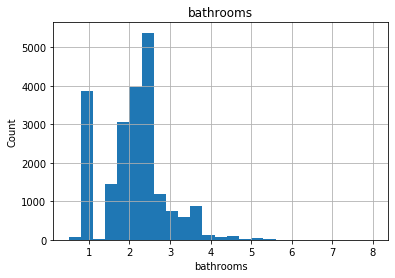

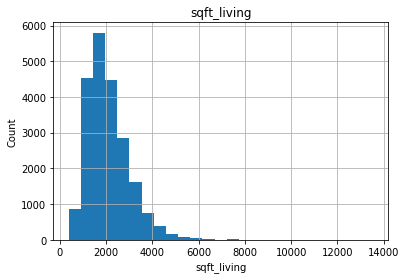

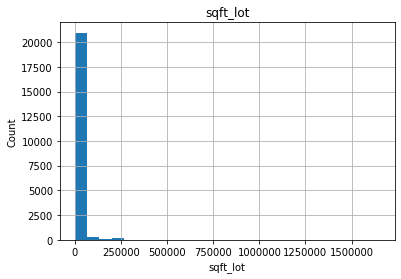

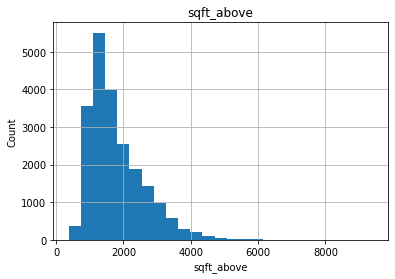

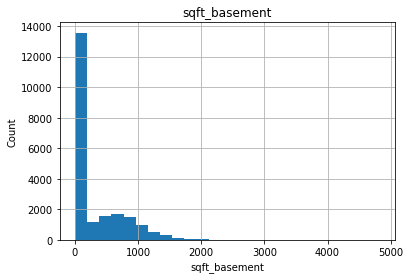

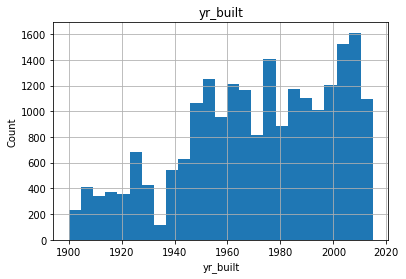

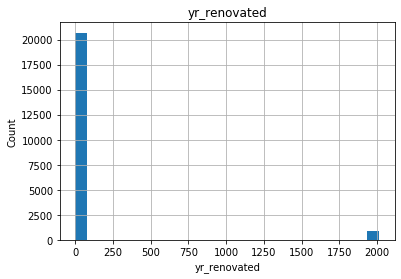

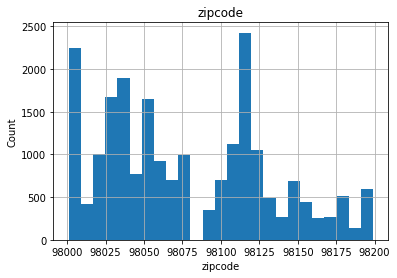

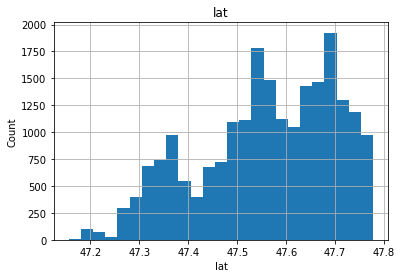

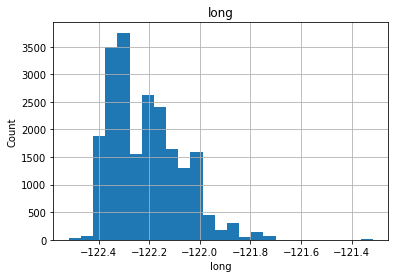

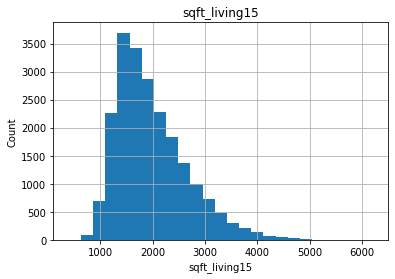

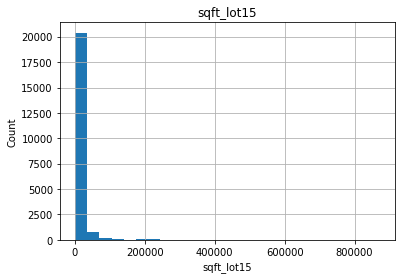

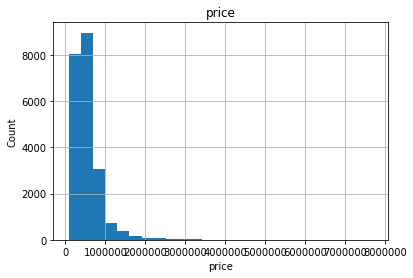

In [9]:

for feature in continuous_feature:
    dataset=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Outlier Detection

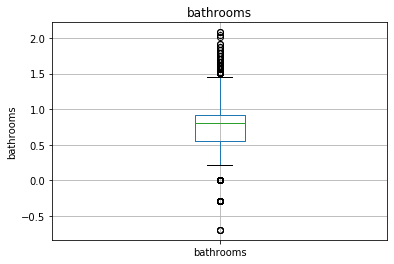

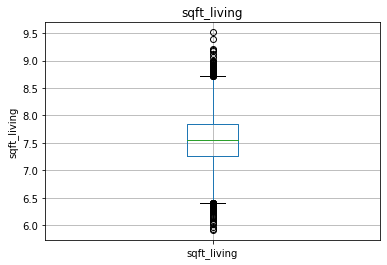

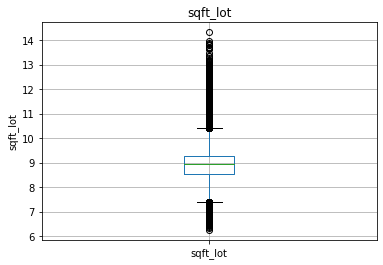

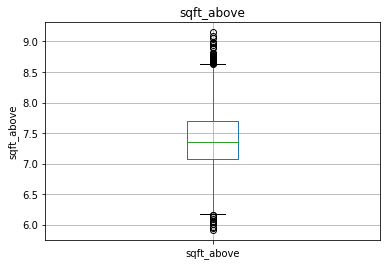

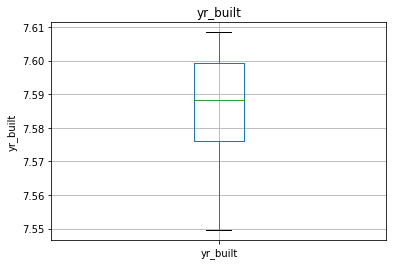

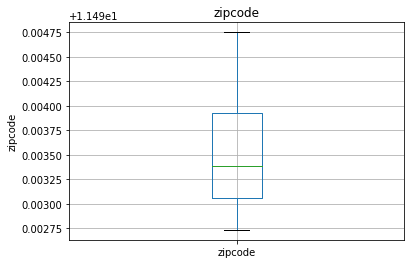

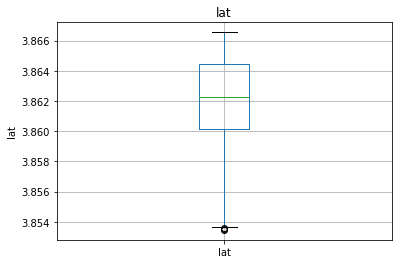

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


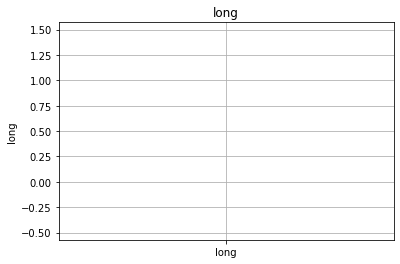

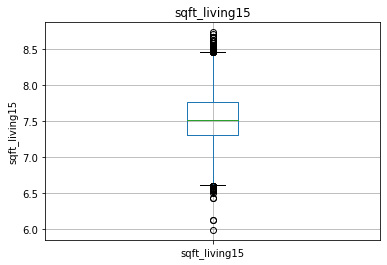

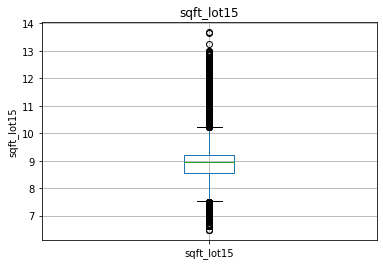

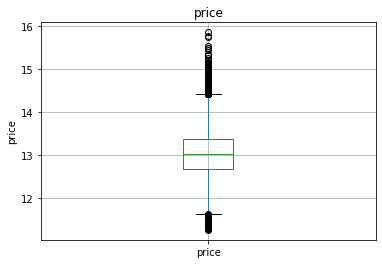

In [10]:
# Boxplot is used to identify outliers in a dataset features
# so we will iterate loop over all  the features that have continuous values to check for outliers
for feature in continuous_feature:
    dataset2=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset2[feature]=np.log(dataset[feature])
        #Also take sales Price log too as the sale price is not perfectly Guassian Distributed
        #dataset["price"]=np.log(dataset["price"])
        dataset2.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Removing Outliers using IQR Method 

In [11]:
# Inter quartile range method is used to remove outliers from columns by calculating its lower and upper quartile
# values below lower quartile and greater then upper quartile will be considered as outliers and we will be droping it

numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

for feature in numerical_features:
        q1=dataset[feature].quantile(0.25)
        q3=dataset[feature].quantile(0.75)
        iqr=q3-q1
        lower_lim=q1-1.5*iqr
        upper_lim=q3+1.5*iqr
        
        dataset=dataset[(dataset[feature]<=upper_lim) & (dataset[feature]>=lower_lim)]
    

    
    
    
  
        

In [29]:
# If we count total Rows now after removing outliers it is 13660 before removing outliers it was 21597
# So a total of 7937 outliers were got removed
dataset

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


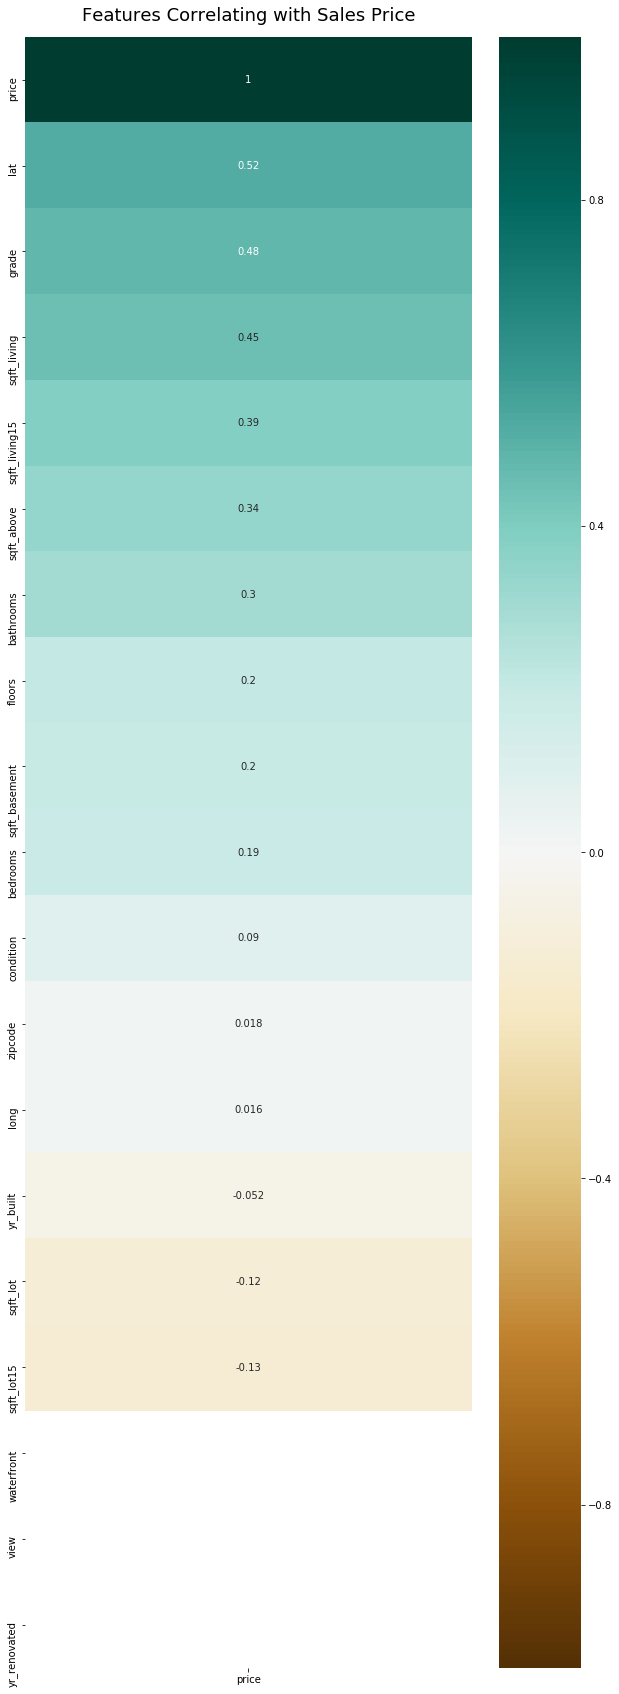

In [13]:
# Visually correlating All the Independedn Columns with Sale Price 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 30))
heatmap = sns.heatmap(dataset.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

# Splitting Dataset

In [14]:
y=dataset[['price']]
x=dataset.drop(['price'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,train_size=0.80)

# Linear Regression

In [16]:
from sklearn import linear_model
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6182280907379067

# Evaluating Model Linear Regression 

In [17]:
# model evaluation for testing set
from sklearn import metrics
y_predicted=model.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 76099.18061642989
MSE is 9684397969.048141
R2 score is 0.6182280907379067


# Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200) 
regressor.fit(x_train, y_train) 
regressor.score(x_test,y_test)


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8448396437044926

# Evaluating Model

In [19]:
# model evaluation for testing set
from sklearn import metrics
y_predicted=regressor.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 44954.840751955075
MSE is 3935948672.3089743
R2 score is 0.8448396437044926


# Support Vector Regressor

In [20]:
from sklearn.svm import SVR

regressor = SVR(C=5,kernel='linear')
regressor.fit(x_train, y_train) 
regressor.score(x_test,y_test)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3413508794050114

# Evaluation of Model SVR

In [21]:
# model evaluation for testing set
from sklearn import metrics
y_predicted=regressor.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 103462.47008401912
MSE is 16707934897.919416
R2 score is 0.3413508794050114


# DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train, y_train) 
model.score(x_test,y_test)

0.6861565387156621

# DecisionTreeRegressor Model Evaluation

In [23]:
# model evaluation for testing set
from sklearn import metrics
y_predicted=model.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 63600.94491215227
MSE is 7961258817.9569
R2 score is 0.6861565387156621


- Hence it was observed that Random Forest Regressor was the best model for this problem with highest accuracy of 84%
- Mean squared Error = 44954.840751955075
- Mean Absolute Error= 3935948672.3089743
- R2 Score=   0.8448396437044926
- So in camparison of it with all other Models this model obviouly did a great job

# Implementing ANN

# Scaling data

In [24]:
# Scaling data to avoid overfitting 

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_trained = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
x_tested = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )

# Importing libraries

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Parametric the Layers

In [30]:


hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.001
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [31]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_trained.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
137/137 [==============================] - 3s 12ms/step - loss: 58.0850 - mean_squared_logarithmic_error: 57.9920 - val_loss: 25.6292 - val_mean_squared_logarithmic_error: 25.6491
Epoch 2/100
137/137 [==============================] - 1s 9ms/step - loss: 17.9172 - mean_squared_logarithmic_error: 17.9049 - val_loss: 12.5482 - val_mean_squared_logarithmic_error: 12.5645
Epoch 3/100
137/137 [==============================] - 1s 9ms/step - loss: 9.5347 - mean_squared_logarithmic_error: 9.5272 - val_loss: 7.2226 - val_mean_squared_logarithmic_error: 7.2361
Epoch 4/100
137/137 [==============================] - 1s 9ms/step - loss: 5.6940 - mean_squared_logarithmic_error: 5.6898 - val_loss: 4.4828 - val_mean_squared_logarithmic_error: 4.4942
Epoch 5/100
137/137 [==============================] - 1s 9ms/step - loss: 3.5931 - mean_squared_logarithmic_error: 3.5898 - val_loss: 2.8978 - val_mean_squared_logarithmic_error: 2.9075
Epoch 6/100
137/137 [==============================] - 1

137/137 [==============================] - 1s 9ms/step - loss: 0.0681 - mean_squared_logarithmic_error: 0.0681 - val_loss: 0.0644 - val_mean_squared_logarithmic_error: 0.0645
Epoch 45/100
137/137 [==============================] - 1s 9ms/step - loss: 0.0668 - mean_squared_logarithmic_error: 0.0668 - val_loss: 0.0629 - val_mean_squared_logarithmic_error: 0.0630
Epoch 46/100
137/137 [==============================] - 1s 10ms/step - loss: 0.0651 - mean_squared_logarithmic_error: 0.0651 - val_loss: 0.0614 - val_mean_squared_logarithmic_error: 0.0615
Epoch 47/100
137/137 [==============================] - 1s 10ms/step - loss: 0.0635 - mean_squared_logarithmic_error: 0.0635 - val_loss: 0.0600 - val_mean_squared_logarithmic_error: 0.0600
Epoch 48/100
137/137 [==============================] - 1s 9ms/step - loss: 0.0627 - mean_squared_logarithmic_error: 0.0627 - val_loss: 0.0587 - val_mean_squared_logarithmic_error: 0.0587
Epoch 49/100
137/137 [==============================] - 1s 10ms/step - 

137/137 [==============================] - 1s 9ms/step - loss: 0.0461 - mean_squared_logarithmic_error: 0.0461 - val_loss: 0.0430 - val_mean_squared_logarithmic_error: 0.0427
Epoch 88/100
137/137 [==============================] - 1s 9ms/step - loss: 0.0461 - mean_squared_logarithmic_error: 0.0460 - val_loss: 0.0430 - val_mean_squared_logarithmic_error: 0.0428
Epoch 89/100
137/137 [==============================] - 1s 9ms/step - loss: 0.0462 - mean_squared_logarithmic_error: 0.0462 - val_loss: 0.0432 - val_mean_squared_logarithmic_error: 0.0430
Epoch 90/100
137/137 [==============================] - 1s 9ms/step - loss: 0.0455 - mean_squared_logarithmic_error: 0.0455 - val_loss: 0.0429 - val_mean_squared_logarithmic_error: 0.0427
Epoch 91/100
137/137 [==============================] - 1s 10ms/step - loss: 0.0455 - mean_squared_logarithmic_error: 0.0456 - val_loss: 0.0426 - val_mean_squared_logarithmic_error: 0.0423
Epoch 92/100
137/137 [==============================] - 1s 9ms/step - lo

# ANN MODEL EVALUATION

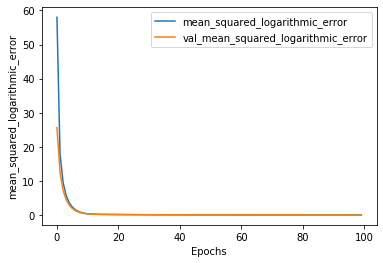

In [32]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')